# For code explanation: Review "Training a Binary Classifier" section in chapter 3: Classification 

In [1]:
# Import necessary libraries for machine learning classification
import numpy as np
from numpy.core.numeric import cross
import pandas as pd
from scipy.sparse.construct import rand
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

/var/folders/hw/mr_tqyws2jx9c63s7wfqf4280000gn/T/ipykernel_2159/3048679458.py:3: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric.cross.
  from numpy.core.numeric import cross
/var/folders/hw/mr_tqyws2jx9c63s7wfqf4280000gn/T/ipykernel_2159/3048679458.py:5: DeprecationWarning: Please import `rand` from the `scipy.sparse` namespace; the `scipy.sparse.construct` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.sparse.construct import rand
/var/folders/hw/mr_tqyws2jx9c63s7wfqf4280000gn/T/ipykernel_2159/304867

In [2]:
# Load the employee retention dataset
df = pd.read_csv('employee_retention.csv')

# Uncomment below to see statistical description of the data
#print(df.describe())

# Uncomment below to see the first few rows of the data
#df.head()

In [3]:
# Data preparation: Separate features from target variable
# X contains the first 7 columns (features/predictors)
# y contains the 8th column (target variable: whether employee left or not)

X = df.iloc[:, 0:7]  # Features: satisfaction_level through promotion_last_5years
y = df.iloc[:, 7]     # Target: 'left' (1 = employee left, 0 = employee stayed)

# Uncomment to inspect the features and target
#print(X)
#print(y)

In [4]:
# Split data into training and test sets
# Using 20% of data for testing (80% for training)
# random_state=42 ensures reproducibility of results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Create and train the Stochastic Gradient Descent Classifier
# SGDClassifier is efficient for large datasets and uses iterative learning
# random_state=42 ensures reproducibility
model = SGDClassifier(random_state=42)
model.fit(X_train, y_train)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [6]:
# Test the trained model on the testing set
# This generates predictions for whether each employee in the test set will leave
predictions = model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], shape=(3000,))

In [7]:
# Calculate the accuracy score of the model on the test set
# This returns the proportion of correct predictions
accuracy = model.score(X_test, y_test)
print(f"Model accuracy on test set: {accuracy:.4f}")
accuracy

Model accuracy on test set: 0.7647


0.7646666666666667

In [8]:
# Perform 10-fold cross-validation on the training data
# This splits the training data into 10 folds and trains/validates 10 times
# This provides a more robust estimate of model performance
cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
cv_scores

Cross-validation scores: [0.7525     0.78       0.73       0.76416667 0.62666667 0.65916667
 0.78666667 0.75833333 0.76       0.76146789]
Mean CV accuracy: 0.7379 (+/- 0.1003)


array([0.7525    , 0.78      , 0.73      , 0.76416667, 0.62666667,
       0.65916667, 0.78666667, 0.75833333, 0.76      , 0.76146789])

In [9]:
# Generate predictions using 10-fold cross-validation
# This returns predictions for each instance when it was in the validation fold
# Useful for calculating metrics without overfitting
y_train_pred = cross_val_predict(model, X_train, y_train, cv=10)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(11999,))

In [10]:
# Generate the confusion matrix
# Confusion matrix shows:
# - True Negatives (top-left): Correctly predicted as staying
# - False Positives (top-right): Incorrectly predicted as leaving
# - False Negatives (bottom-left): Incorrectly predicted as staying
# - True Positives (bottom-right): Correctly predicted as leaving

conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("\nInterpretation:")
print(f"True Negatives (stayed, predicted stayed): {conf_matrix[0][0]}")
print(f"False Positives (stayed, predicted left): {conf_matrix[0][1]}")
print(f"False Negatives (left, predicted stayed): {conf_matrix[1][0]}")
print(f"True Positives (left, predicted left): {conf_matrix[1][1]}")

Confusion Matrix:
[[8063 1071]
 [2074  791]]

Interpretation:
True Negatives (stayed, predicted stayed): 8063
False Positives (stayed, predicted left): 1071
False Negatives (left, predicted stayed): 2074
True Positives (left, predicted left): 791


In [11]:
# Calculate the precision score
# Precision = TP / (TP + FP)
# Answers: "Of all employees predicted to leave, what proportion actually left?"
# High precision means few false alarms
precision = precision_score(y_train, y_train_pred)
print(f"Precision: {precision:.4f}")
precision

Precision: 0.4248


0.424812030075188

In [12]:
# Calculate the recall score (also known as sensitivity or true positive rate)
# Recall = TP / (TP + FN)
# Answers: "Of all employees who actually left, what proportion did we correctly identify?"
# High recall means we catch most of the employees who will leave
recall = recall_score(y_train, y_train_pred)
print(f"Recall: {recall:.4f}")
recall

Recall: 0.2761


0.27609075043630016

In [13]:
# Calculate the F1 score
# F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
# F1 is the harmonic mean of precision and recall
# Useful when you need a balance between precision and recall
f1 = f1_score(y_train, y_train_pred)
print(f"F1 Score: {f1:.4f}")
f1

F1 Score: 0.3347


0.3346731542204358

In [14]:
# Calculate decision scores for each instance
# decision_function returns the signed distance to the hyperplane
# Higher scores indicate higher confidence that the instance belongs to the positive class
y_scores = cross_val_predict(model, X_train, y_train, cv=10, method="decision_function")
y_scores

array([-149.35947398,   -8.13000032, -152.27697487, ..., -402.36061134,
       -316.42688671, -375.43506579], shape=(11999,))

In [15]:
# Calculate precision, recall, and thresholds for different decision thresholds
# This allows us to analyze the precision-recall tradeoff
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
print(f"Number of thresholds: {len(thresholds)}")
print(f"Precision range: {precisions.min():.4f} to {precisions.max():.4f}")
print(f"Recall range: {recalls.min():.4f} to {recalls.max():.4f}")

Number of thresholds: 11759
Precision range: 0.0000 to 1.0000
Recall range: 0.0000 to 1.0000


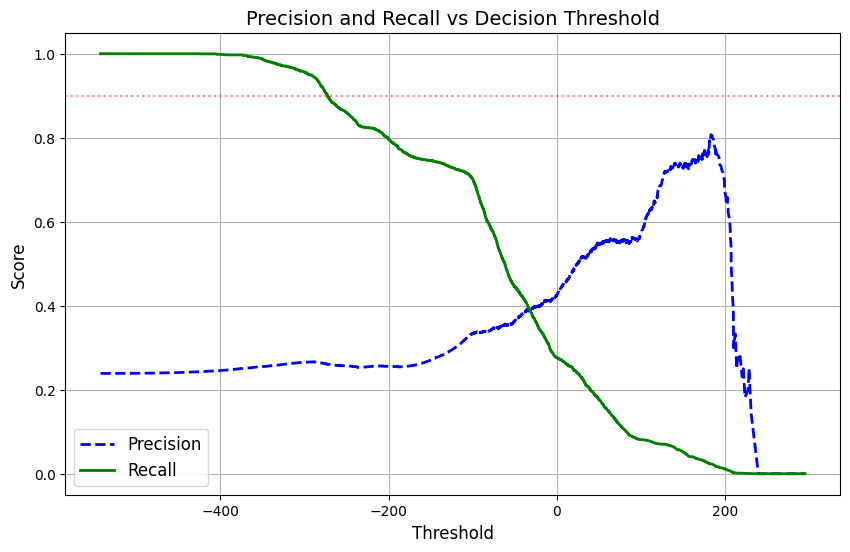

In [16]:
# Generate the precision-recall curve to determine the optimal decision threshold
# This helps visualize the tradeoff between precision and recall

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Plot precision and recall as functions of the decision threshold
    """
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=12)
    plt.ylabel("Score", fontsize=12)
    plt.title("Precision and Recall vs Decision Threshold", fontsize=14)
    plt.legend(loc="best", fontsize=12)
    plt.grid(True)
    plt.axhline(y=0.9, color='r', linestyle=':', alpha=0.5, label='90% line')
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

# Comments on threshold selection for employee retention context:
# 
# For employee retention, we should prioritize RECALL over precision because:
# 1. Missing an employee who will leave (False Negative) is costly - we lose the employee
# 2. False alarms (False Positive) are less costly - we might offer retention incentives
#    to someone who wasn't planning to leave, but this builds goodwill
# 3. It's better to be proactive and intervene with more employees than to miss
#    high-value employees who are planning to leave
#
# Recommended threshold: Lower than default (0) to achieve higher recall (e.g., 80-90%)
# This ensures we identify most employees at risk of leaving, even if it means
# some false positives. The cost of losing a good employee far outweighs the cost
# of unnecessary retention efforts.

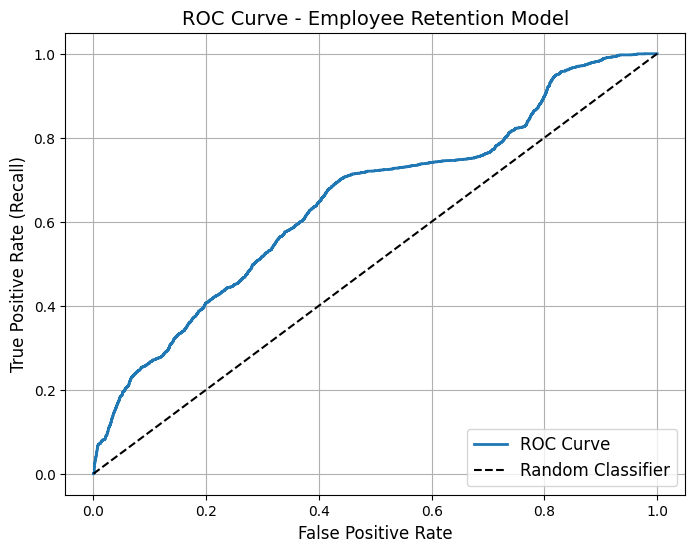

True Positive Rate range: 0.0000 to 1.0000
False Positive Rate range: 0.0000 to 1.0000


In [17]:
# Generate the ROC (Receiver Operating Characteristic) curve
# ROC curve plots True Positive Rate (Recall) vs False Positive Rate
# A good classifier stays as close as possible to the top-left corner

fpr, tpr, thresholds_roc = roc_curve(y_train, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')  # Diagonal line
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('ROC Curve - Employee Retention Model', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

print(f"True Positive Rate range: {tpr.min():.4f} to {tpr.max():.4f}")
print(f"False Positive Rate range: {fpr.min():.4f} to {fpr.max():.4f}")

In [18]:
# Calculate the Area Under the ROC Curve (AUC-ROC)
# AUC-ROC measures the overall performance of the classifier
# AUC = 1.0: Perfect classifier
# AUC = 0.5: Random classifier (no better than coin flip)
# AUC < 0.5: Worse than random (predictions are inverted)
# Generally: AUC > 0.9 = Excellent, 0.8-0.9 = Good, 0.7-0.8 = Fair, < 0.7 = Poor

roc_auc = roc_auc_score(y_train, y_scores)
print(f"Area Under the ROC Curve (AUC-ROC): {roc_auc:.4f}")

if roc_auc > 0.9:
    print("Model Performance: Excellent")
elif roc_auc > 0.8:
    print("Model Performance: Good")
elif roc_auc > 0.7:
    print("Model Performance: Fair")
else:
    print("Model Performance: Needs Improvement")
    
roc_auc

Area Under the ROC Curve (AUC-ROC): 0.6494
Model Performance: Needs Improvement


0.6493905363272677